<a href="https://colab.research.google.com/github/An-Aeonic-Ant/Breast_Cancer_Classifier/blob/main/sklearn(Breast_cancer).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [ ]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix,accuracy_score

# Read and remove null columns

In [ ]:
import pandas as pd
df=pd.read_csv("/content/data.csv")
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [ ]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
df.drop(df.columns[32],axis=1,inplace=True)
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

# Visualization

In [ ]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [ ]:
import plotly.express as px
freq_series=df['diagnosis'].value_counts()
pie_chart=px.pie(names=freq_series.index,values=freq_series.values)
pie_chart.show()

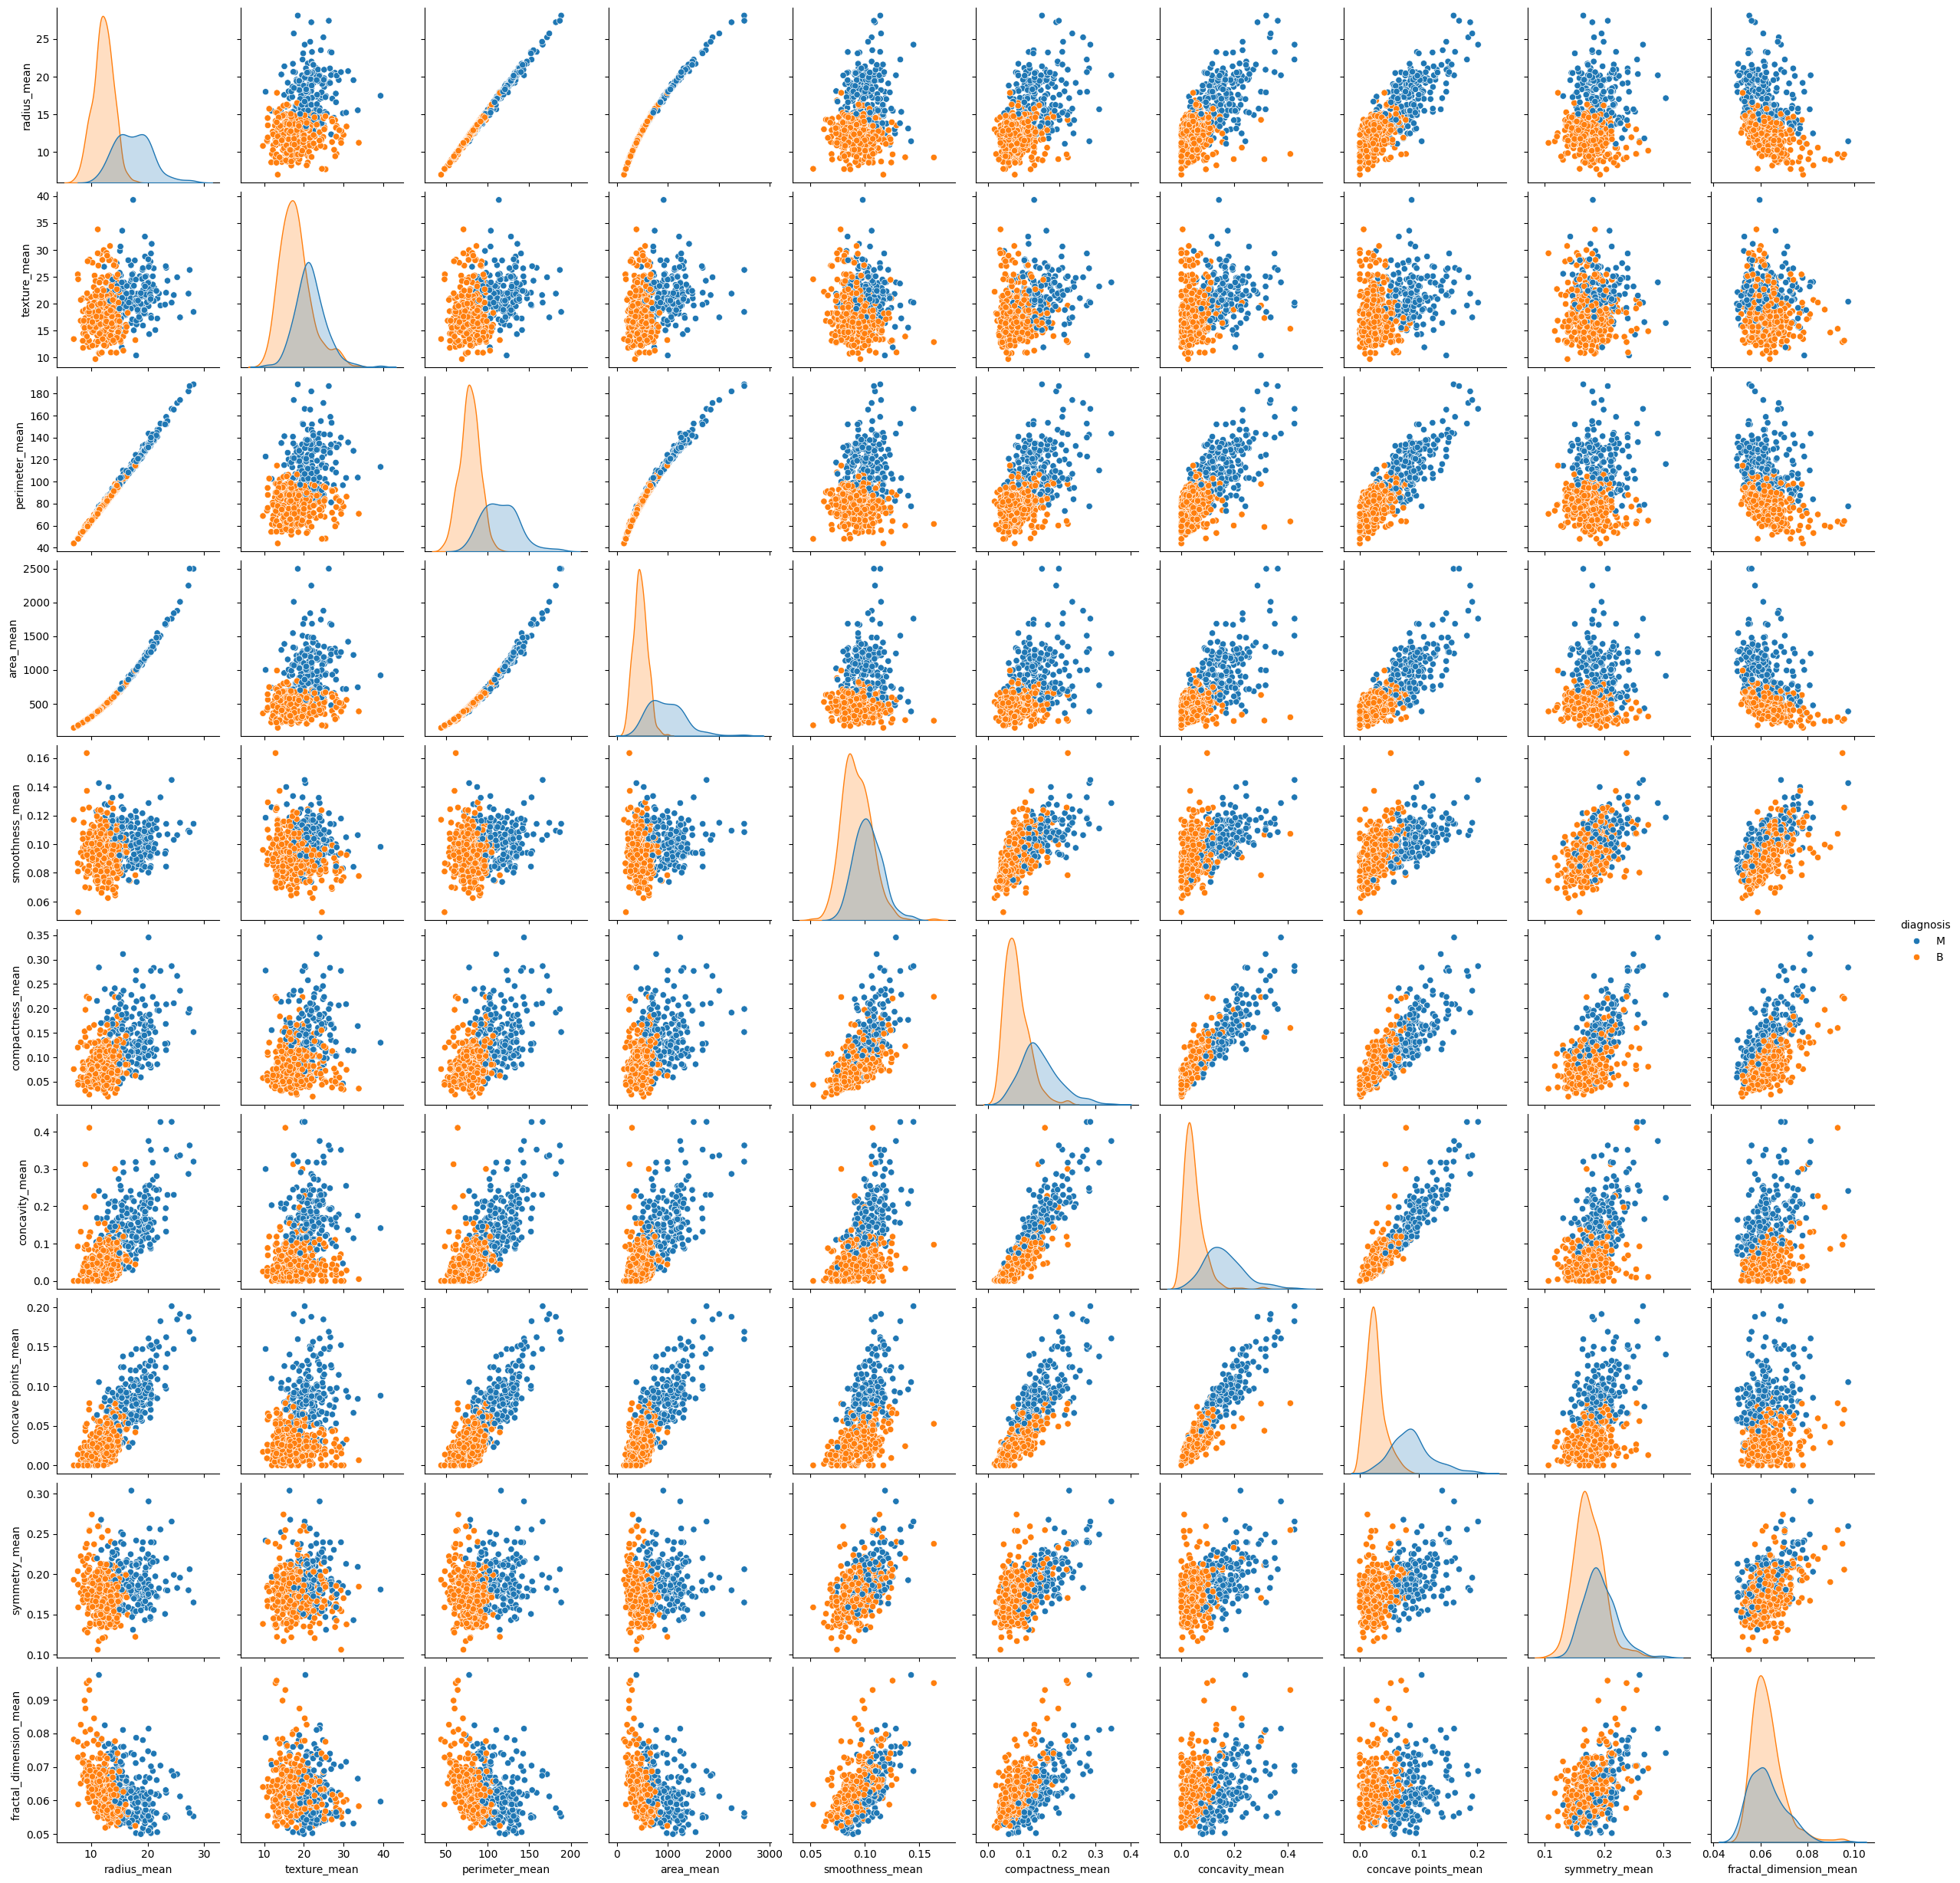

In [ ]:
import seaborn as sns

pairplot=sns.pairplot(df.iloc[:,1:12],hue='diagnosis')

<Axes: >

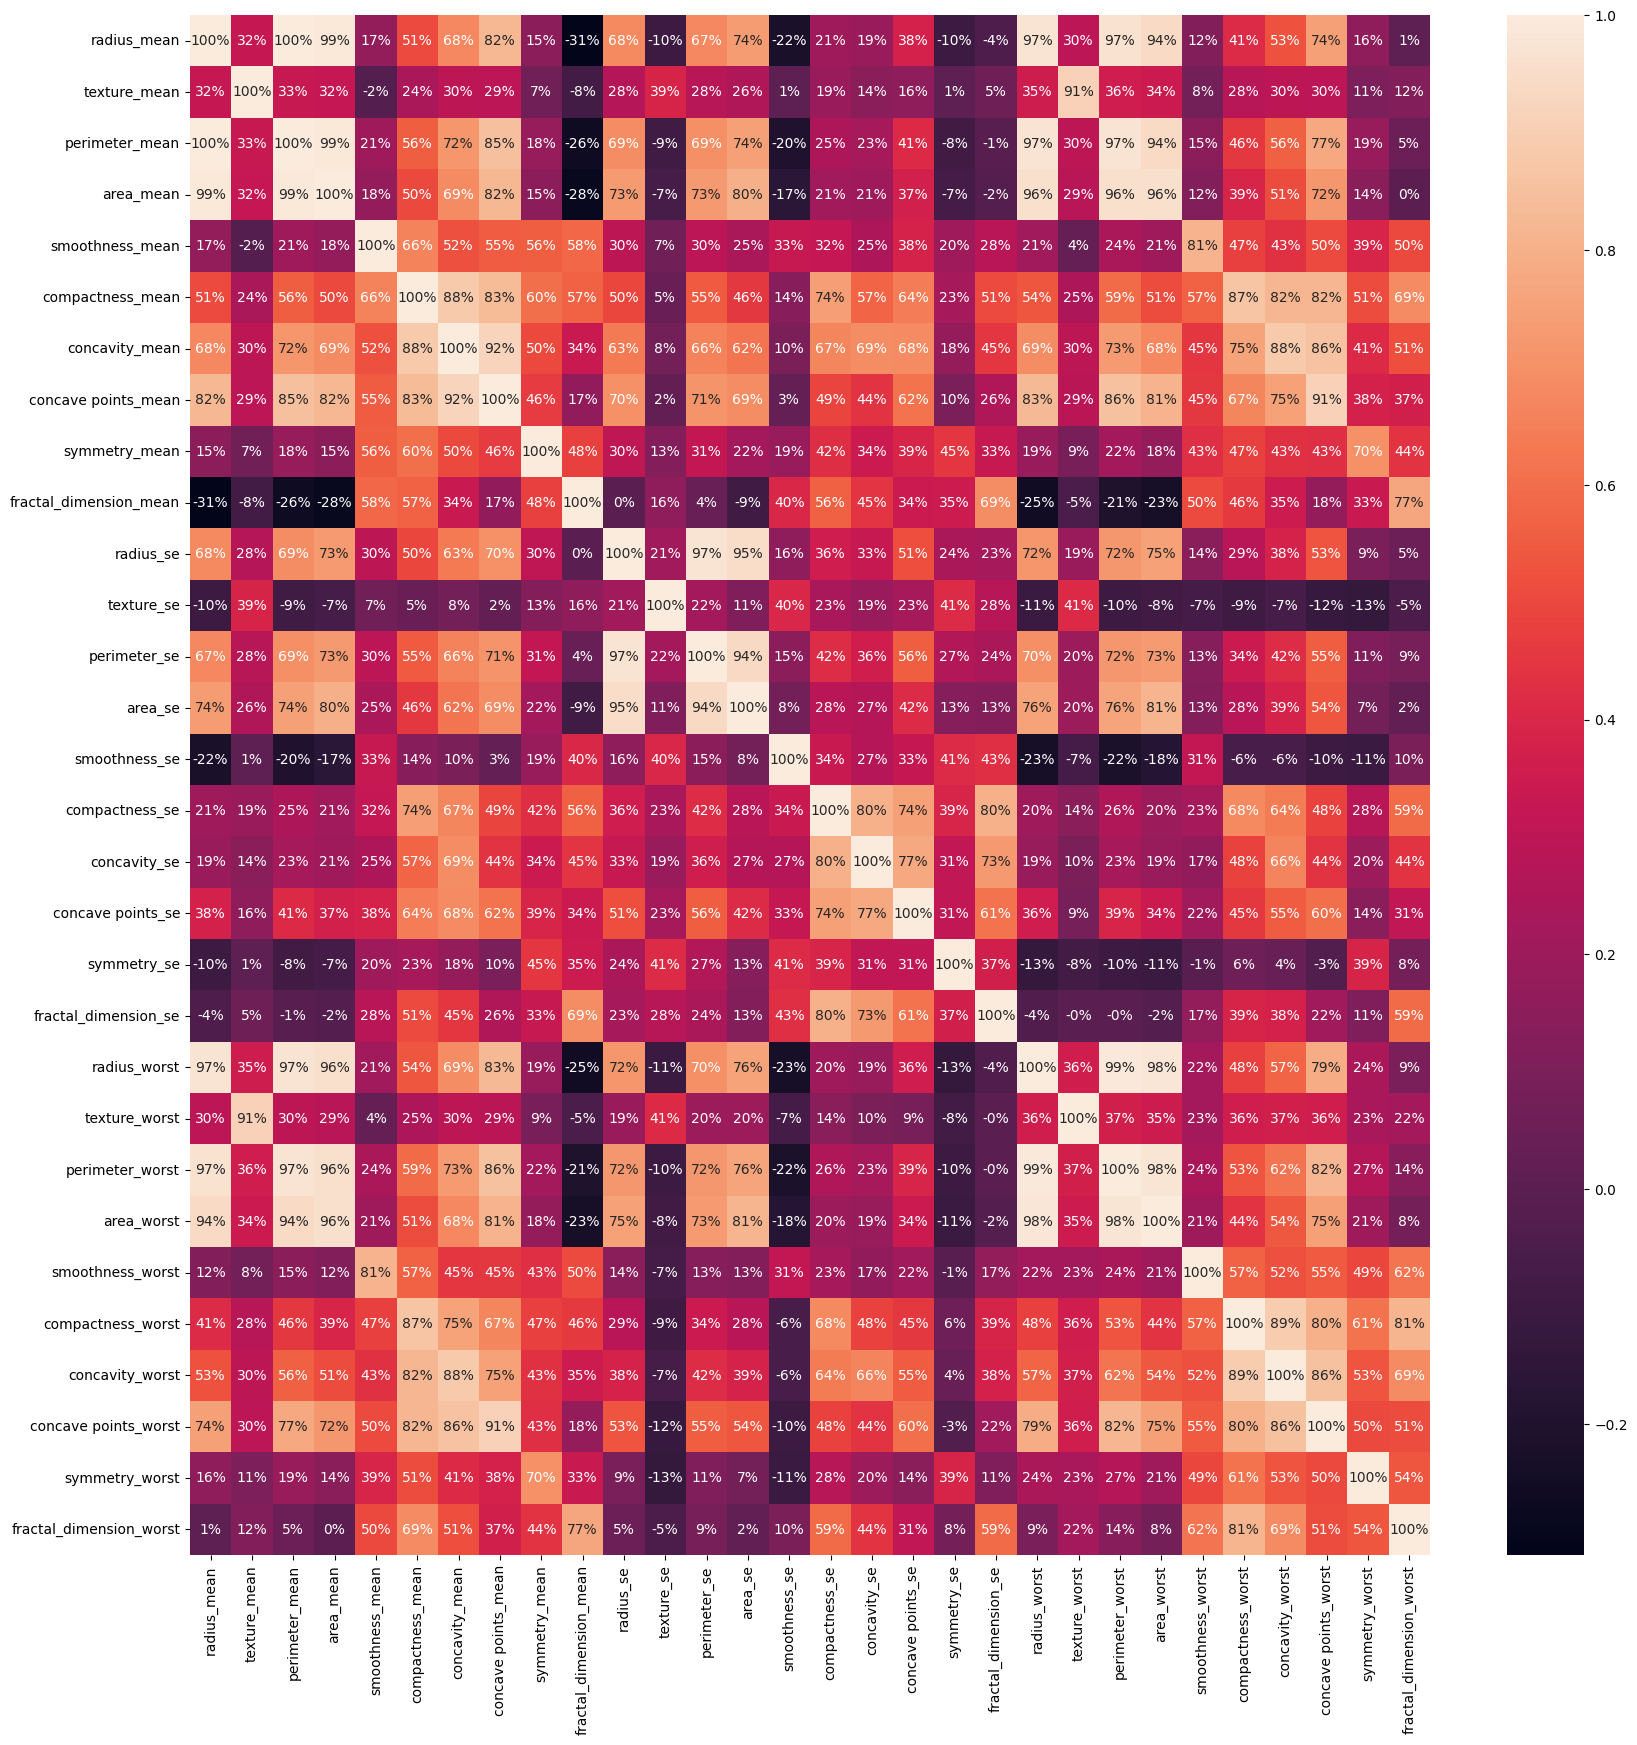

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(df.iloc[:,2:].corr(),annot=True,fmt=".0%")

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

columns=df.columns[2:12]
scaled_data=scaler.fit_transform(df[columns])
scaled_df=pd.DataFrame(scaled_data,columns=columns)




fig = px.box(scaled_df,points="outliers")

# Show the plot
fig.show()

#Drop bad columns


Run if you want to drop columns that dont give good info

In [ ]:
df.drop('texture_mean',axis=1)
df.drop('texture_worst',axis=1)
df.drop('texture_se',axis=1)

df.drop('smoothness_mean',axis=1)
df.drop('smoothness_se',axis=1)
df.drop('smoothness_worst',axis=1)

df.drop('fractal_dimension_mean',axis=1)
df.drop('fractal_dimension_se',axis=1)
df.drop('fractal_dimension_worst',axis=1)

id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302          1        17.99         10.38          122.80   
1      842517          1        20.57         17.77          132.90   
2    84300903          1        19.69         21.25          130.00   
3    84348301          1        11.42         20.38           77.58   
4    84358402          1        20.29         14.34          135.10   
..        ...        ...          ...           ...             ...   
564    926424          1        21.56         22.39          142.00   
565    926682          1        20.13         28.25          131.20   
566    926954          1        16.60         28.08          108.30   
567    927241          1        20.60         29.33          140.10   
568     92751          0         7.76         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0       1001.0          0.11840           0.27760         0.30010   
1       1326.0          0.08474           0.07864         0.08690   
2       1203.0          0.10960           0.15990         0.19740   
3        386.1          0.14250           0.28390         0.24140   
4       1297.0          0.10030           0.13280         0.19800   
..         ...              ...               ...             ...   
564     1479.0          0.11100           0.11590         0.24390   
565     1261.0          0.09780           0.10340         0.14400   
566      858.1          0.08455           0.10230         0.09251   
567     1265.0          0.11780           0.27700         0.35140   
568      181.0          0.05263           0.04362         0.00000   

     concave points_mean  ...  fractal_dimension_se  radius_worst  \
0                0.14710  ...              0.006193        25.380   
1                0.07017  ...              0.003532        24.990   
2                0.12790  ...              0.004571        23.570   
3                0.10520  ...              0.009208        14.910   
4                0.10430  ...              0.005115        22.540   
..                   ...  ...                   ...           ...   
564              0.13890  ...              0.004239        25.450   
565              0.09791  ...              0.002498        23.690   
566              0.05302  ...              0.003892        18.980   
567              0.15200  ...              0.006185        25.740   
568              0.00000  ...              0.002783         9.456   

     texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0            17.33           184.60      2019.0           0.16220   
1            23.41           158.80      1956.0           0.12380   
2            25.53           152.50      1709.0           0.14440   
3            26.50            98.87       567.7           0.20980   
4            16.67           152.20      1575.0           0.13740   
..             ...              ...         ...               ...   
564          26.40           166.10      2027.0           0.14100   
565          38.25           155.00      1731.0           0.11660   
566          34.12           126.70      1124.0           0.11390   
567          39.42           184.60      1821.0           0.16500   
568          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  
0              0.66560           0.7119                0.2654          0.4601  
1              0.18660           0.2416                0.1860          0.2750  
2              0.42450           0.4504                0.2430          0.3613  
3              0.86630           0.6869                0.2575          0.6638  
4              0.20500           0.4000                0.1625          0.2364  
..                 ...              ...                   ...             ...  
564            0.21130           0.4107                0.2216          0.2060  
565            0.19220         

# Handle datatype

In [ ]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['diagnosis']=le.fit_transform(df['diagnosis'])
mapping=dict(zip(le.classes_,le.transform(le.classes_)))
mapping #{'B': 0, 'M': 1}

{'B': 0, 'M': 1}

# Splitting and scaling

In [ ]:
from sklearn.model_selection import train_test_split
x=df.iloc[:,2:].values
y=df.iloc[:,1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
type(x_train)

numpy.ndarray

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)


# Handling outliers

Run this to ampute data

In [ ]:
for i in range(x_train.shape[1]):
    upper = np.percentile(x_train[:, i], 75)
    lower = np.percentile(x_train[:, i], 25)
    iqr = (upper - lower) * 1.5

    upper_limit = upper + iqr
    lower_limit = lower - iqr

    x_train[:, i] = np.clip(x_train[:, i], lower_limit, upper_limit)

Run this to remove data

In [ ]:
for i in range(x_train.shape[1]):
    upper = np.percentile(x_train[:, i], 75)
    lower = np.percentile(x_train[:, i], 25)
    iqr = (upper - lower) * 1.5

    upper_bound = upper + iqr
    lower_bound = lower - iqr
    filter=(x_train[:, i] <= upper_bound) & (x_train[:, i] >= lower_bound)
    x_train = x_train[filter]
    y_train=y_train[filter]
x_train

array([[ 1.20384557e-01,  9.33644122e-01,  6.96993067e-02, ...,
         3.31601934e-01, -6.64888431e-01, -8.59893983e-01],
       [-5.24631283e-01,  6.82918971e-01, -5.16168086e-01, ...,
        -5.03314132e-01, -1.00160288e+00,  3.67148606e-01],
       [-3.21993563e-01,  1.04028922e-03, -4.01650097e-01, ...,
        -1.59925752e+00, -7.26109240e-01, -1.15873294e+00],
       ...,
       [ 7.59692292e-01,  3.61886749e-02,  6.68429227e-01, ...,
        -4.65869787e-01, -5.84334736e-01, -1.33191749e+00],
       [-8.51072150e-02, -7.37075810e-01, -1.62656033e-01, ...,
        -1.06915699e+00, -5.60168627e-01, -9.76260889e-01],
       [-2.90598987e-01,  2.89257052e-01, -3.41486661e-01, ...,
        -1.12207420e+00, -3.26562911e-01, -5.35924145e-01]])

# PCA and Polynomial features

In [ ]:
from sklearn.decomposition import PCA

pca=PCA()
pca.fit(x_train)

cum_ratio=np.cumsum(pca.explained_variance_ratio_)
fig=px.line(x=np.arange(1,cum_ratio.shape[0]+1),y=cum_ratio,markers=True,labels={'x':"No of principle components",'y':"Variance Retained"})
fig.show()

In [ ]:
new_pca=PCA(n_components=7)
pca.fit_transform(x_train)


array([[ 8.67971863e+00, -8.27721019e-01,  9.26031731e-01, ...,
        -5.04524666e-02,  6.72524112e-02, -5.68438476e-03],
       [-4.65350952e+00, -7.44767802e-01,  2.59556086e-01, ...,
        -2.15670139e-03,  1.12370166e-02,  3.36308144e-03],
       [ 1.05723802e+00,  8.10244289e+00,  4.23296911e-01, ...,
         1.02188389e-02, -1.86649358e-02, -4.17544841e-02],
       ...,
       [-2.21390889e+00, -3.94648559e-01, -1.06807678e+00, ...,
         4.87940882e-03, -2.20564719e-02,  1.27251874e-03],
       [-1.17012400e+00,  1.72293184e+00,  1.66925928e+00, ...,
         2.13815753e-02,  1.62561219e-03, -1.12527202e-02],
       [-2.97173135e+00, -9.31441777e-02, -7.64185453e-01, ...,
         5.96401905e-03,  1.14940014e-02, -6.25378057e-03]])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=2)
poly.fit_transform(x_train)
poly.transform(x_test)

array([[ 1.        ,  2.51974289,  0.11635315, ...,  3.4911868 ,
         1.45682306,  0.60791173],
       [ 1.        ,  2.80329345,  1.83055574, ...,  0.10765479,
         0.05323262,  0.02632221],
       [ 1.        ,  2.82742542,  1.76010905, ...,  0.23215116,
         0.10091158,  0.04386429],
       ...,
       [ 1.        ,  1.53938189,  1.27167873, ...,  2.91824407,
         0.85671135,  0.25150547],
       [ 1.        , -0.80141851,  0.15392471, ...,  0.30839819,
         0.23799051,  0.18365699],
       [ 1.        ,  3.11700897,  0.24080895, ...,  0.27107994,
        -0.10864497,  0.04354336]])

# Classification

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_classifier=LogisticRegression()
logistic_classifier.fit(x_train,y_train)

y_preds=logistic_classifier.predict(x_test)

print(accuracy_score(y_test,y_preds))
confusion_matrix(y_test,y_preds)


0.9912280701754386


array([[61,  1],
       [ 0, 52]])

Support vector Classsifier

In [ ]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)
y_preds=svc.predict(x_test)

print(accuracy_score(y_test,y_preds))
confusion_matrix(y_test,y_preds)

0.9912280701754386


array([[62,  0],
       [ 1, 51]])

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier(criterion='entropy')
tree.fit(x_train,y_train)
y_preds=tree.predict(x_test)

print(accuracy_score(y_test,y_preds))
confusion_matrix(y_test,y_preds)

0.9385964912280702


array([[59,  3],
       [ 4, 48]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest=RandomForestClassifier(n_estimators=100,criterion="entropy")
forest.fit(x_train,y_train)
y_preds=forest.predict(x_test)

print(accuracy_score(y_test,y_preds))
confusion_matrix(y_test,y_preds)

0.9912280701754386


array([[62,  0],
       [ 1, 51]])